# CNN Model with Fashion MNIST Implementation

## Basic concepts of CNN model :

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-9-15-21-pm.png)
Three basic components to define a basic convolutional neural network.

### The Convolutional Layer
### The Pooling layer
### The Output layer

Let’s see each of them in detail

### The Convolutional Layer :

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28011851/conv.gif)


Let’s see how this looks like in a real image.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28132834/convimages.png)



#### What is Stride?

Let us see for stride of 2 how it looks.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28090227/stride1.gif)

#### Padding
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28094927/padding.gif)


#### Multiple filters & the Activation Map

You can visualize it as –
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28113904/activation-map.png)
This activation map is the output of the convolution layer.

### The Pooling Layer


![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28022816/maxpool.png)


Let’s see how max pooling looks on a real image.
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/28133544/pooling.png)


#### Output dimensions

We can apply a simple formula to calculate the output dimensions.

The spatial size of the output image can be calculated as( [W-F+2P]/S)+1. 
where, W is the input volume size, 
       F is the size of the filter, 
       P is the number of padding applied 
       S is the number of strides. 
       
Let us take an example of an input image of size 64*64*3, we apply 10 filters of size 3*3*3, with single stride and no zero padding.

Here W=64, F=3, P=0 and S=1. The output depth will be equal to the number of filters applied i.e. 10.

The size of the output volume will be ([64-3+0]/1)+1 = 62. Therefore the output volume will be 62*62*10.

### The Output layer

* The Output layer has a loss function like categorical cross-entropy, to compute the error in prediction. Once the forward pass is complete the backpropagation begins to update the weight and biases for error and loss reduction.


### Implement CNN model in realtime using Fashion MNIST dataset

![](https://pyimagesearch.com/wp-content/uploads/2019/02/fashion_mnist_dataset_sample.png)


#### Labels
Each training and test example is assigned to one of the following labels:

* 0 T-shirt/top 
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot 


* Each row is a separate image
* Column 1 is the class label.
* Remaining columns are pixel numbers (784 total).
* Each value is the darkness of the pixel (1 to 255)

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 20

**Create dataframes for train and test datasets**

In [2]:
train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

Let us explore the train and test data

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_data = np.array(train_df, dtype = 'float32')

Similarly let us do the same process for test data

In [6]:
test_data = np.array(test_df, dtype='float32')

In [7]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

In [8]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

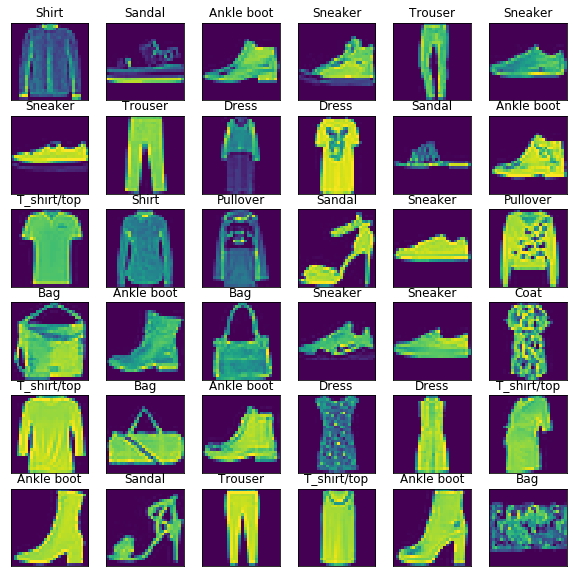

In [9]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

Labels
Each training and test example is assigned to one of the following labels as shown below:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot




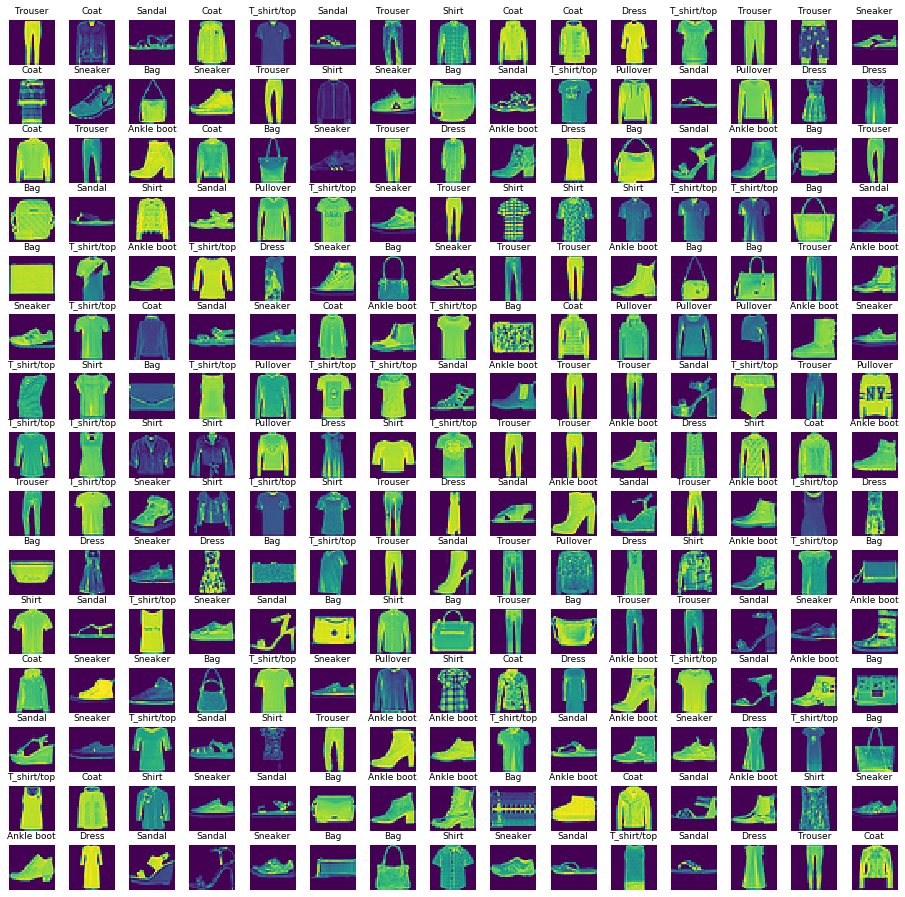

In [10]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_data) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_data[index,1:].reshape((28,28)) )
    labelindex = int(train_data[index,0])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)


### Create the Convolutional Neural Networks (CNN)

#### Define model

In [11]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 

In [12]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [13]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])

#### Compile model

In [14]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])


#### Train model

In [15]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/75
12/12 [==============================] - 45s 3s/step - loss: 1.9296 - accuracy: 0.3339 - val_loss: 1.0293 - val_accuracy: 0.6688
Epoch 2/75
12/12 [==============================] - 35s 3s/step - loss: 0.9229 - accuracy: 0.6909 - val_loss: 0.7002 - val_accuracy: 0.7564
Epoch 3/75
12/12 [==============================] - 34s 3s/step - loss: 0.6807 - accuracy: 0.7673 - val_loss: 0.6120 - val_accuracy: 0.7855
Epoch 4/75
12/12 [==============================] - 57s 5s/step - loss: 0.5996 - accuracy: 0.7920 - val_loss: 0.5441 - val_accuracy: 0.8000
Epoch 5/75
12/12 [==============================] - 67s 5s/step - loss: 0.5386 - accuracy: 0.8108 - val_loss: 0.5016 - val_accuracy: 0.8222
Epoch 6/75
12/12 [==============================] - 46s 4s/step - loss: 0.5090 - accuracy: 0.8223 - val_loss: 0.4877 - val_accuracy: 0.8254
Epoch 7/75
12/12 [==============================] - 44s 4s/step - loss: 0.4796 - accuracy: 0.8282 - val_loss: 0.4582 - val_accuracy: 0.8372
Epoch 8/75
12/12 [==

Text(0.5, 1.0, 'Train - Accuracy')

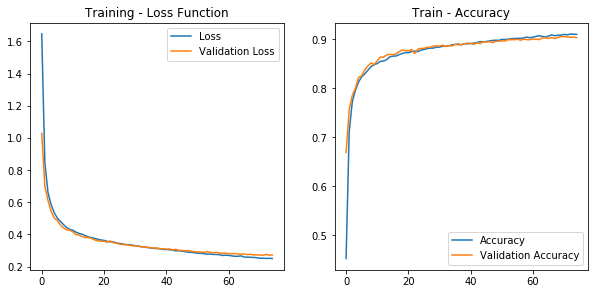

In [17]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

- #### Evaluate /Score the model

In [18]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2714
Test Accuracy : 0.9044


### Results



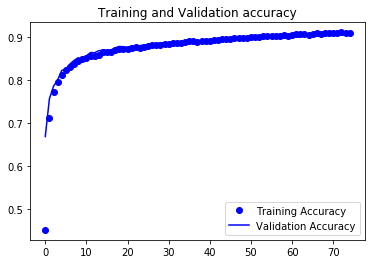

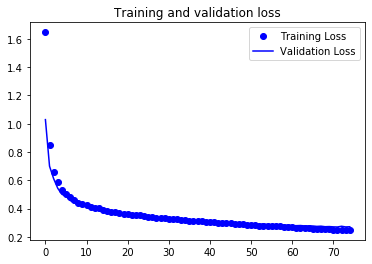

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Classification Report


In [20]:
#Get the predictions for the test data
predicted_classes = cnn_model.predict_classes(x_test)
#Get the indices to be plotted
y_true = test_df.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.82      0.88      0.85      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.88      0.84      0.86      1000
     Class 3       0.90      0.92      0.91      1000
     Class 4       0.83      0.90      0.86      1000
     Class 5       0.99      0.95      0.97      1000
     Class 6       0.77      0.67      0.71      1000
     Class 7       0.93      0.97      0.95      1000
     Class 8       0.96      0.98      0.97      1000
     Class 9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



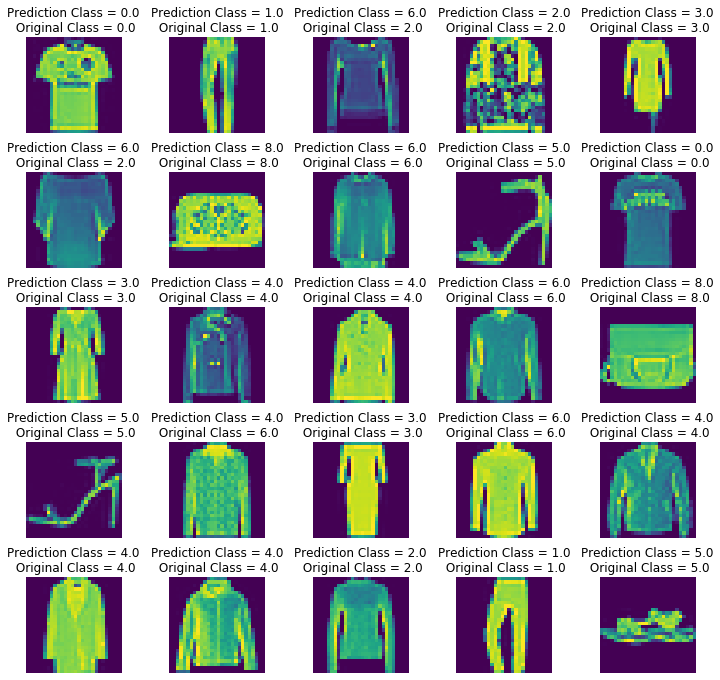

In [21]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)